# **Introducción a R para Análisis de Datos**
## Capítulo 6: Visualización de Datos

**Autor:** Juan Martin Bellido  

**Descripción**  
La visualización de datos es la representación gráfica de información. Se trata de una herramienta esencial para comprender y analizar grandes conjuntos de datos de manera más eficiente.

En este capítulo exploraremos *ggplot2* la librería más popular en R para la visualización de datos.

**¿Feedback? ¿comentarios?** Por favor compártelo conmigo escribiéndome por [LinkedIn](https://www.linkedin.com/in/jmartinbellido/)  



## INDICE
---

1. Gráficos de dispersión
2. Histogramas y gráficos de densidad
3. Gráficos boxplot
4. Gráficos de barra
5. Gráficos de serie temporal
6. Ejercicios





### Preparativos antes de comenzar

In [ ]:
# instalamos librerías
install.packages("data.table")

In [ ]:
# importamos
require(dplyr)
require(ggplot2)
require(data.table)

In [ ]:
# editamos opciones globales para evitar notación científica
options(scipen=999)

# 1. Gráficos de dispersión
---

In [ ]:
# importamos dataset
df_jamesbond = data.table::fread("https://data-wizards.s3.amazonaws.com/datasets/jamesbond.csv")
glimpse(df_jamesbond)

Rows: 26
Columns: 7
$ Film                <chr> "Dr. No", "From Russia with Love", "Goldfinger", "…
$ Year                <int> 1962, 1963, 1964, 1965, 1967, 1967, 1969, 1971, 19…
$ Actor               <chr> "Sean Connery", "Sean Connery", "Sean Connery", "S…
$ Director            <chr> "Terence Young", "Terence Young", "Guy Hamilton", …
$ `Box Office`        <dbl> 448.8, 543.8, 820.4, 848.1, 315.0, 514.2, 291.5, 4…
$ Budget              <dbl> 7.0, 12.6, 18.6, 41.9, 85.0, 59.9, 37.3, 34.7, 30.…
$ `Bond Actor Salary` <dbl> 0.6, 1.6, 3.2, 4.7, NA, 4.4, 0.6, 5.8, NA, NA, NA,…


### Introducción a *ggplot*

Gráfico de dispersión utilizando la función `plot()` de R Base.

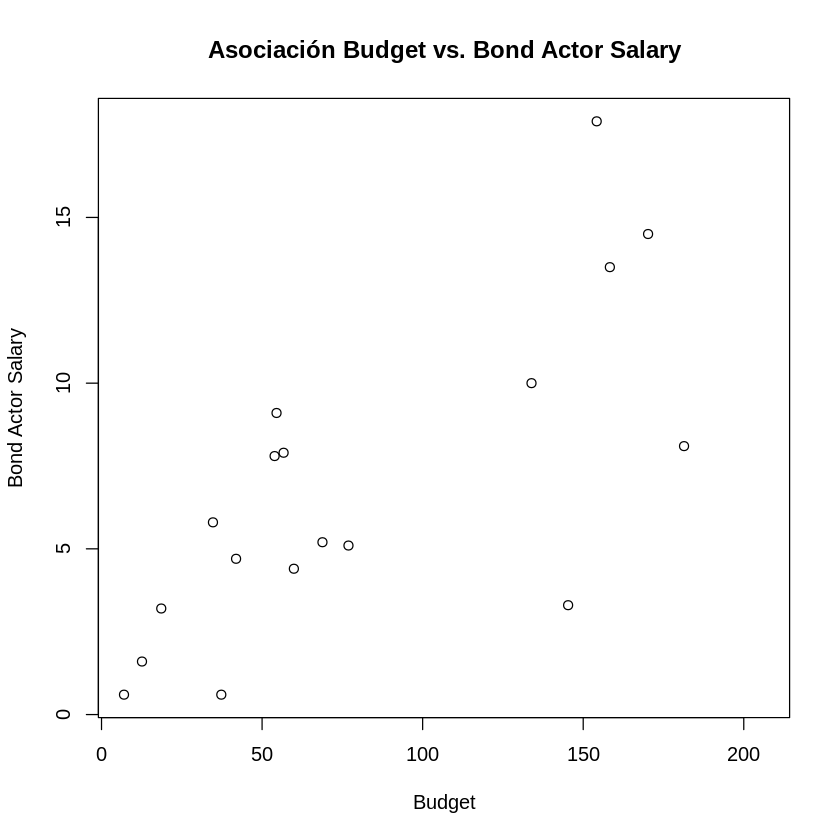

In [ ]:
# gráfico de dispersión utilizando R Base
plot(
  x=df_jamesbond$Budget
  ,y=df_jamesbond$`Bond Actor Salary`
  ,type='p'
  ,main='Asociación Budget vs. Bond Actor Salary'
  ,xlab='Budget'
  ,ylab='Bond Actor Salary'
)

Gráfico de dispersión utilizando la librería *ggplot*. Definimos variables/dimensiones editando el parámetro `mapping`; la función `geom_point()` nos permite generar un gráfico de tipo dispersión.

Warning message:
“Removed 8 rows containing missing values (`geom_point()`).”


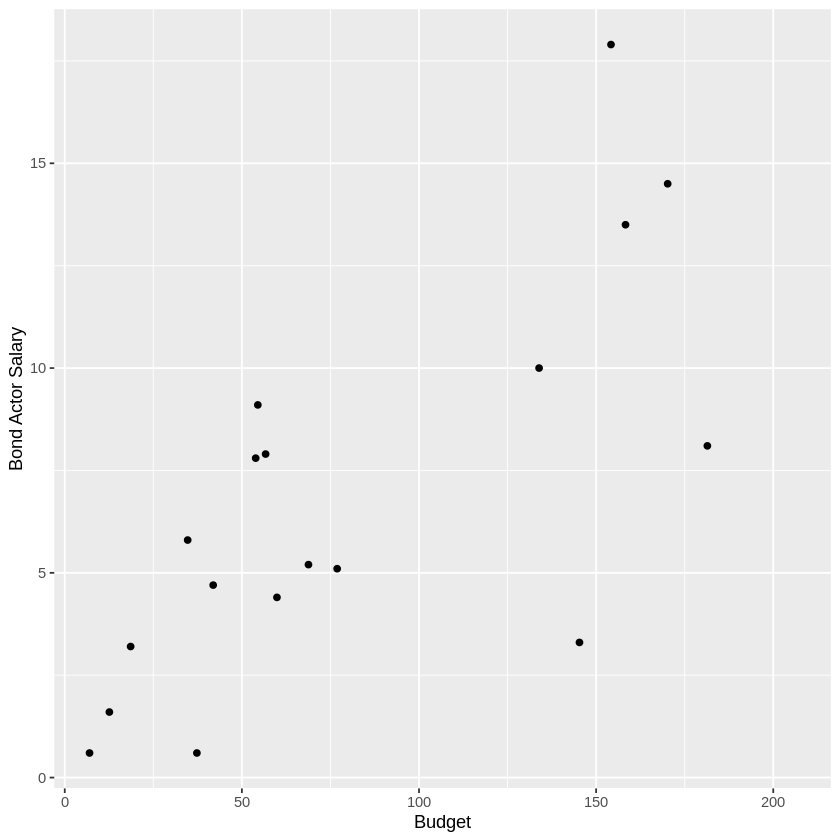

In [ ]:
# gráfico utilizando ggplot()
df_jamesbond %>% ggplot(
  mapping=aes(                        # esto define las variables/dimensiones
    x=Budget,
    y=`Bond Actor Salary`
  )
) + geom_point(                       # esto define la capa gráfica (gráfico de dispersión)
)

Segundo gráfico de dispersión utilizando *ggplot*. 
* Editamos opciones de estética de nuestro gráfico de dispersión dentro de `geom_point()`. 
* La función `theme_bw()` permite cambiar el tema a uno específico en blanco y negro (existen varios). 
* La función `labs()` permite añadir títulos, nombres a los ejes, etc.

Warning message:
“Removed 8 rows containing missing values (`geom_point()`).”


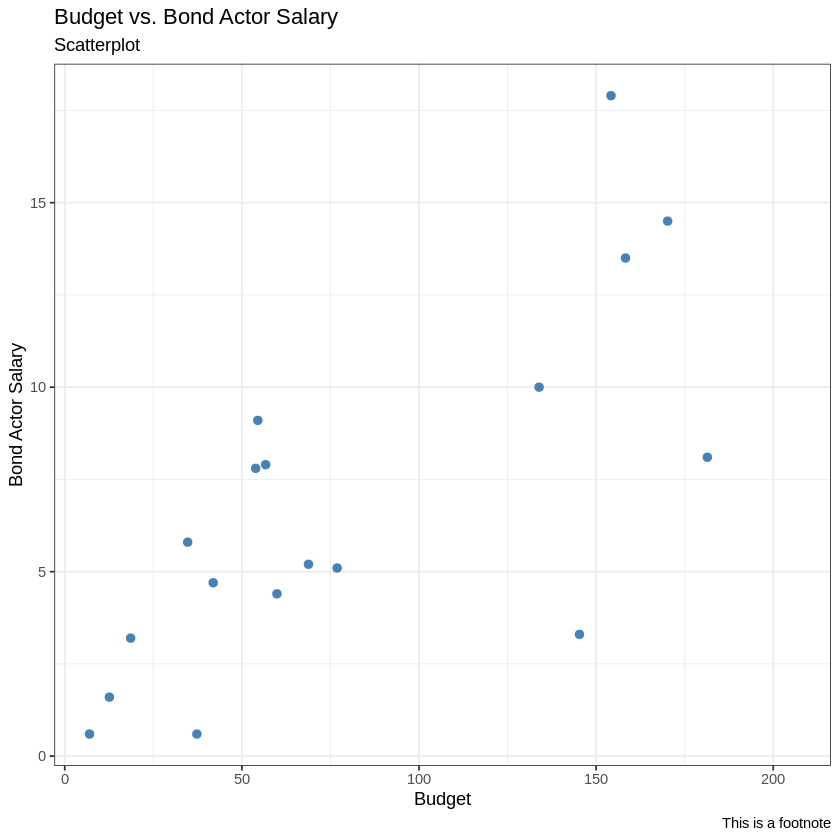

In [ ]:
# gráfico más avanzado utilizando ggplot()
df_jamesbond %>% ggplot(
  mapping=aes(
    x=Budget,
    y=`Bond Actor Salary`
  )
) + geom_point(
  col="steelblue",                            
  size=2
) + theme_bw(
) + labs(
  title="Budget vs. Bond Actor Salary",               # Title
  subtitle="Scatterplot",                             # Subtitle
  x="Budget",                                         # Leyend X
  y="Bond Actor Salary",                              # Leyend Y
  caption="This is a footnote"                        # Footnote
)

### Gráficos de dispersión avanzados

Añadimos una nueva dimensión a nuestro gráfico al distinguir observaciones según color.

Warning message:
“Removed 8 rows containing missing values (`geom_point()`).”


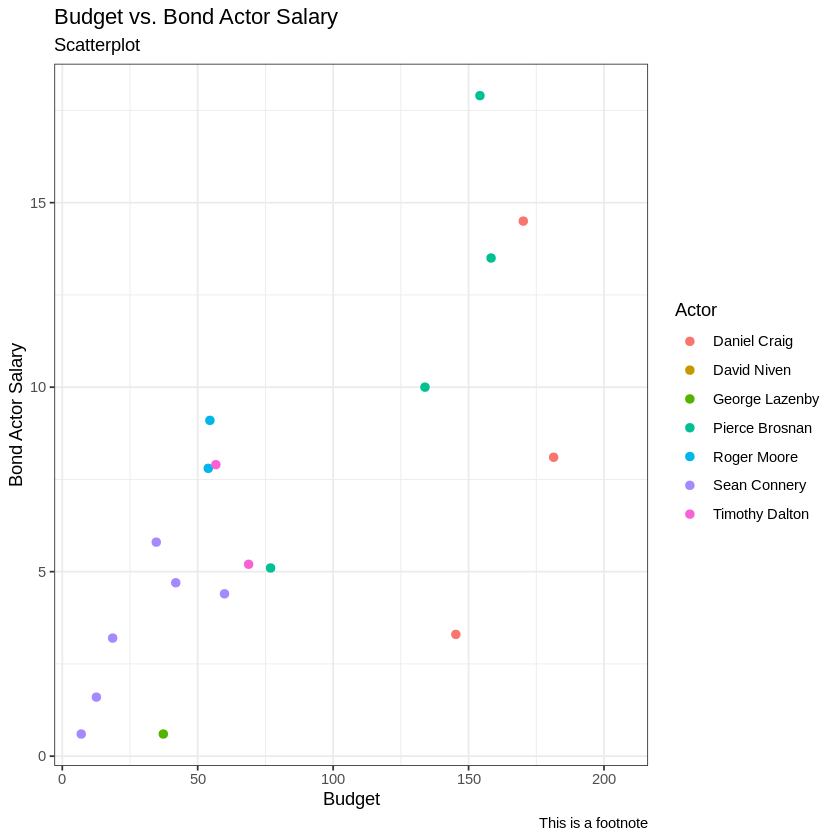

In [ ]:
# gráfico de dispersión avanzado
## añadimos una nueva dimensión en mapping
df_jamesbond %>% ggplot(
  mapping=aes(
    x=Budget
    ,y=`Bond Actor Salary`
    ,color=Actor                                      # nueva variable en nuestro gráfico
  )
) + geom_point(
  size=2
) + theme_bw(
) + labs(
  title="Budget vs. Bond Actor Salary"                # Title
  ,subtitle="Scatterplot"                             # Subtitle
  ,x="Budget"                                         # Leyend X
  ,y="Bond Actor Salary"                              # Leyend Y
  ,caption="This is a footnote"                       # Footnote
)

Añadimos una nueva (cuarta) dimensión en nuestra visualización, generando un gráfico específico para cada valor de una variable categórica. Para esto, utilizaremos la función `facet_wrap()`.

Warning message:
“Removed 8 rows containing missing values (`geom_point()`).”


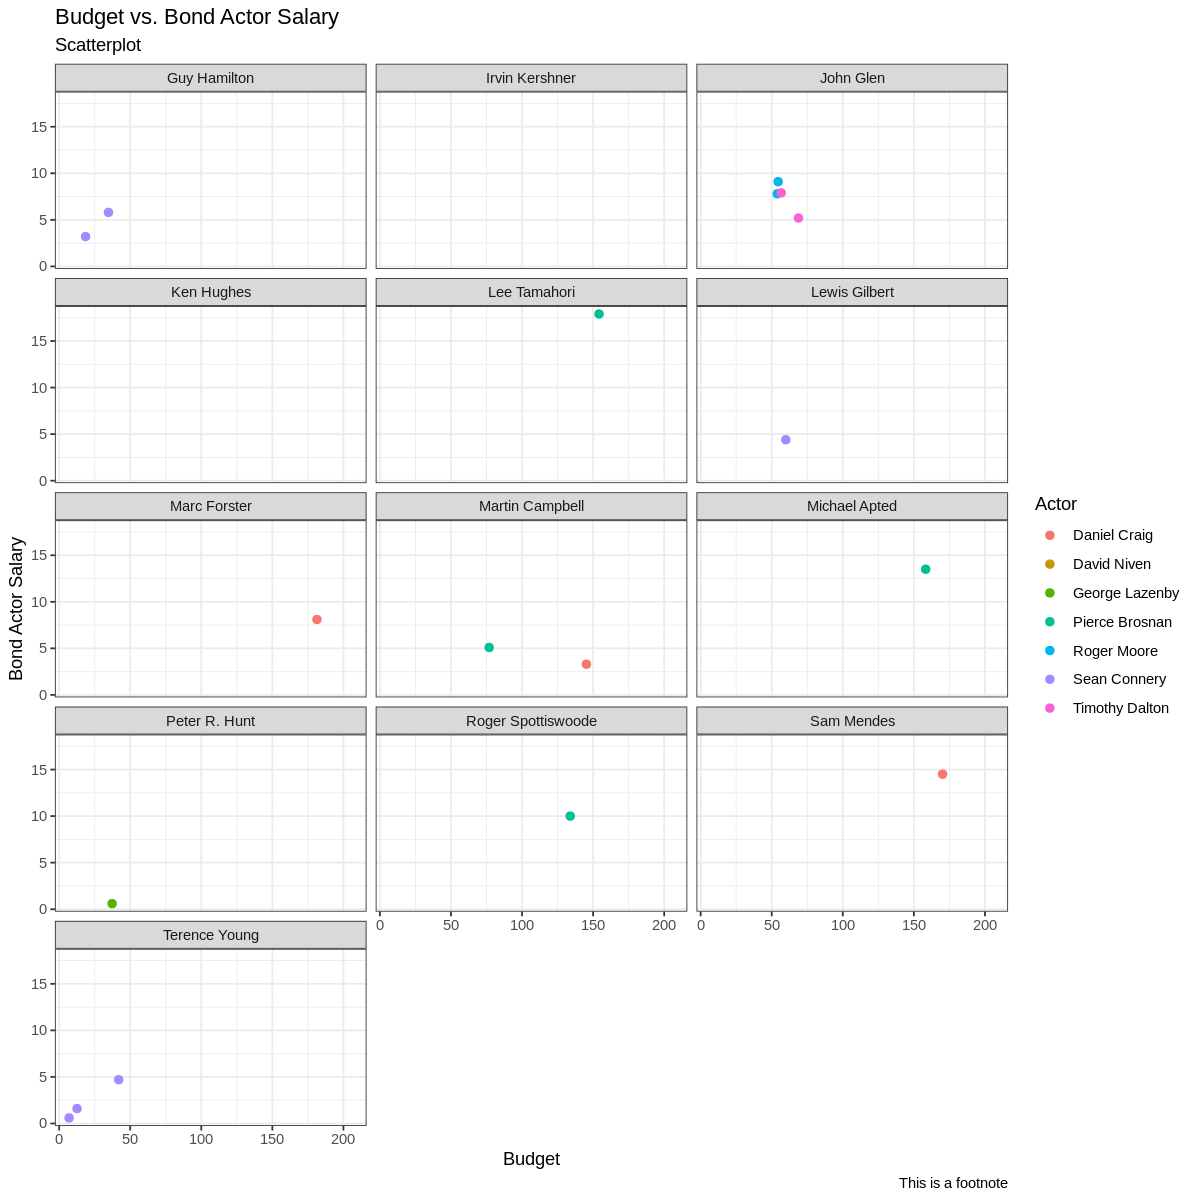

In [ ]:
# editamos las dimensiones del gráfico
options(repr.plot.width=10, repr.plot.height=10)

# Gráfico utilizando ggplot()
df_jamesbond %>% ggplot(
  mapping=aes(
    x=Budget
    ,y=`Bond Actor Salary`
    ,color=Actor
  )
) + geom_point(
  size=2
) + theme_bw(
) + labs(
  title="Budget vs. Bond Actor Salary"                # Title
  ,subtitle="Scatterplot"                             # Subtitle
  ,x="Budget"                                         # Leyend X
  ,y="Bond Actor Salary"                              # Leyend Y
  ,caption="This is a footnote"                       # Footnote
) + facet_wrap(
  ~ Director,                                         # generamos gráficos independientes para cada valor de esta variable
  ncol=3                                              # especificamos la cantidad de columnas
)

# 2. Histogramas y gráficos de densidad
---


In [ ]:
# importamos dataset
df_jamesbond = data.table::fread("https://data-wizards.s3.amazonaws.com/datasets/jamesbond.csv")
glimpse(df_jamesbond)

Rows: 26
Columns: 7
$ Film                <chr> "Dr. No", "From Russia with Love", "Goldfinger", "…
$ Year                <int> 1962, 1963, 1964, 1965, 1967, 1967, 1969, 1971, 19…
$ Actor               <chr> "Sean Connery", "Sean Connery", "Sean Connery", "S…
$ Director            <chr> "Terence Young", "Terence Young", "Guy Hamilton", …
$ `Box Office`        <dbl> 448.8, 543.8, 820.4, 848.1, 315.0, 514.2, 291.5, 4…
$ Budget              <dbl> 7.0, 12.6, 18.6, 41.9, 85.0, 59.9, 37.3, 34.7, 30.…
$ `Bond Actor Salary` <dbl> 0.6, 1.6, 3.2, 4.7, NA, 4.4, 0.6, 5.8, NA, NA, NA,…


Gráfico de dispersión utilizando la función `hist()` de R Base.

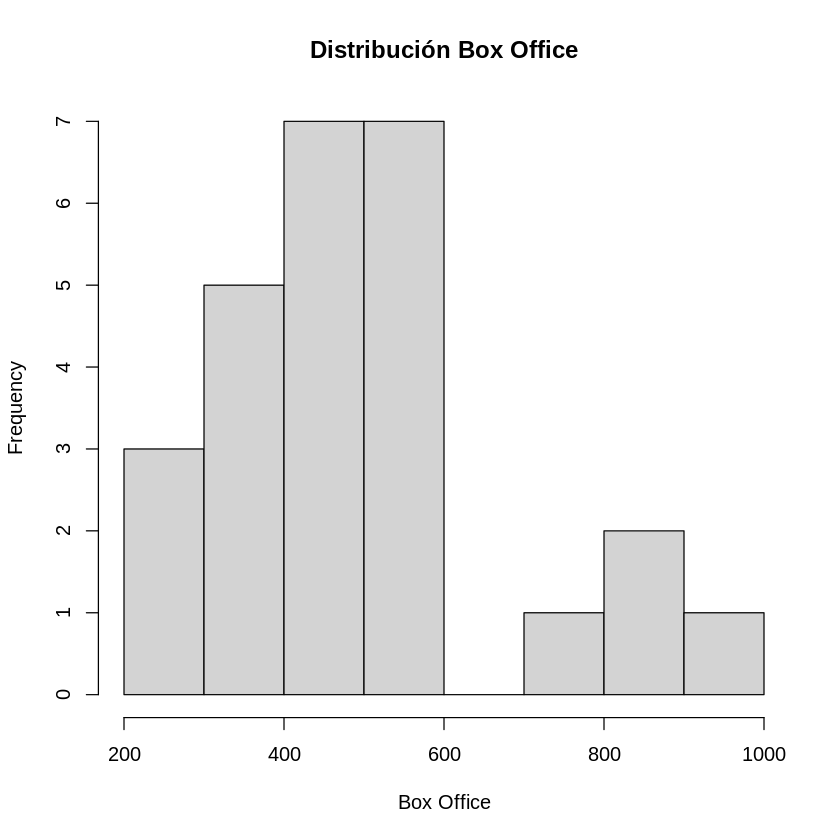

In [ ]:
# graficamos histograma utilizando R Base
hist(
  x=df_jamesbond$`Box Office`
  ,main='Distribución Box Office'
  ,xlab='Box Office'
  ,ylab='Frequency'
)

Gráfico de dispersión utilizando la función *ggplot*. Utilizamos la función `geom_histogram()` para declarar un gráfico de tipo histograma utilizamos.

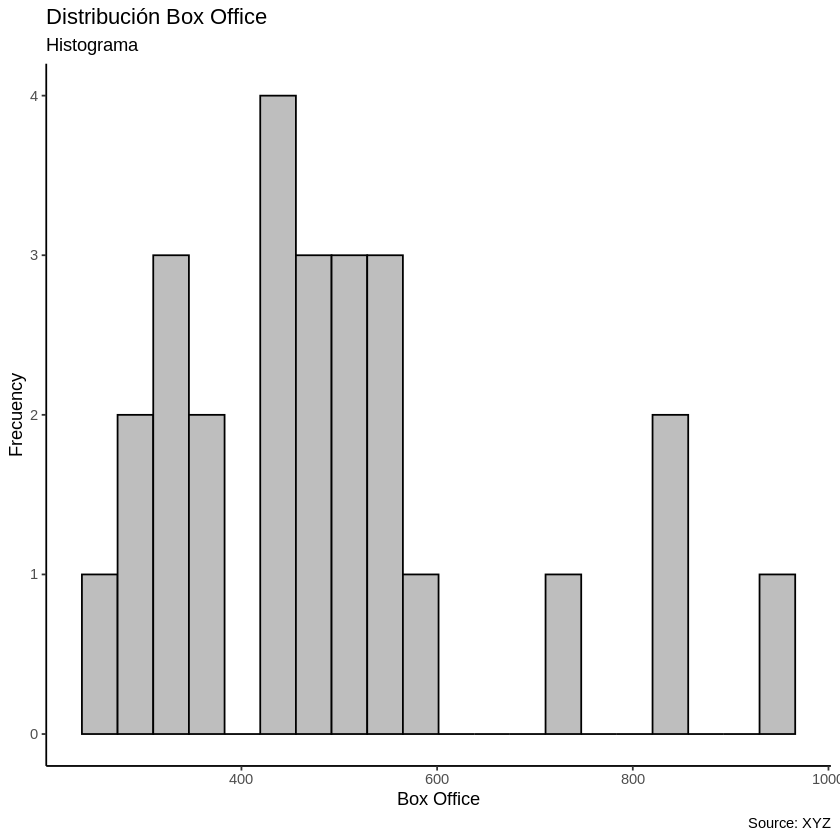

In [ ]:
# gráfico utilizando ggplot()
df_jamesbond %>% ggplot(
  mapping=aes(x=`Box Office`)
) + geom_histogram(
  bins=20
  ,color='black'
  ,fill='grey'
) + theme_classic(
) + labs(
  title="Distribución Box Office "                    # Title
  ,subtitle="Histograma"                              # Subtitle
  ,x="Box Office"                                     # Leyend X
  ,y="Frecuency"                                      # Leyend Y
  ,caption="Source: XYZ"                              # Footnote
)

Gráfico de densidad utilizando *ggplot*. Utilizamos la función `geom_density()`.

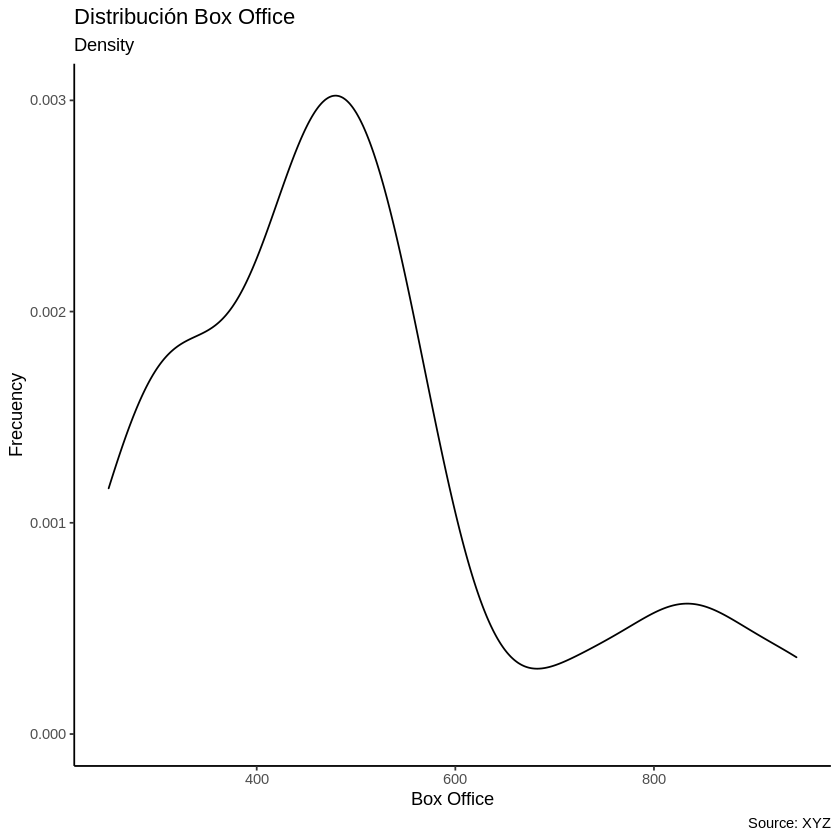

In [ ]:
# gráfico utilizando ggplot()
df_jamesbond %>% ggplot(
  mapping=aes(x=`Box Office`)
) + geom_density(
  color='black'
) + theme_classic(
) + labs(
  title="Distribución Box Office "                    # Title
  ,subtitle="Density"                                 # Subtitle
  ,x="Box Office"                                     # Leyend X
  ,y="Relative Frecuency"                             # Leyend Y
  ,caption="Source: XYZ"                              # Footnote
)

# 3. Gráficos boxplot
---

In [ ]:
# importamos dataset
df_jamesbond = data.table::fread("https://data-wizards.s3.amazonaws.com/datasets/jamesbond.csv")
glimpse(df_jamesbond)

Rows: 26
Columns: 7
$ Film                <chr> "Dr. No", "From Russia with Love", "Goldfinger", "…
$ Year                <int> 1962, 1963, 1964, 1965, 1967, 1967, 1969, 1971, 19…
$ Actor               <chr> "Sean Connery", "Sean Connery", "Sean Connery", "S…
$ Director            <chr> "Terence Young", "Terence Young", "Guy Hamilton", …
$ `Box Office`        <dbl> 448.8, 543.8, 820.4, 848.1, 315.0, 514.2, 291.5, 4…
$ Budget              <dbl> 7.0, 12.6, 18.6, 41.9, 85.0, 59.9, 37.3, 34.7, 30.…
$ `Bond Actor Salary` <dbl> 0.6, 1.6, 3.2, 4.7, NA, 4.4, 0.6, 5.8, NA, NA, NA,…


Boxplot utilizando la función `boxplot()` de R base.

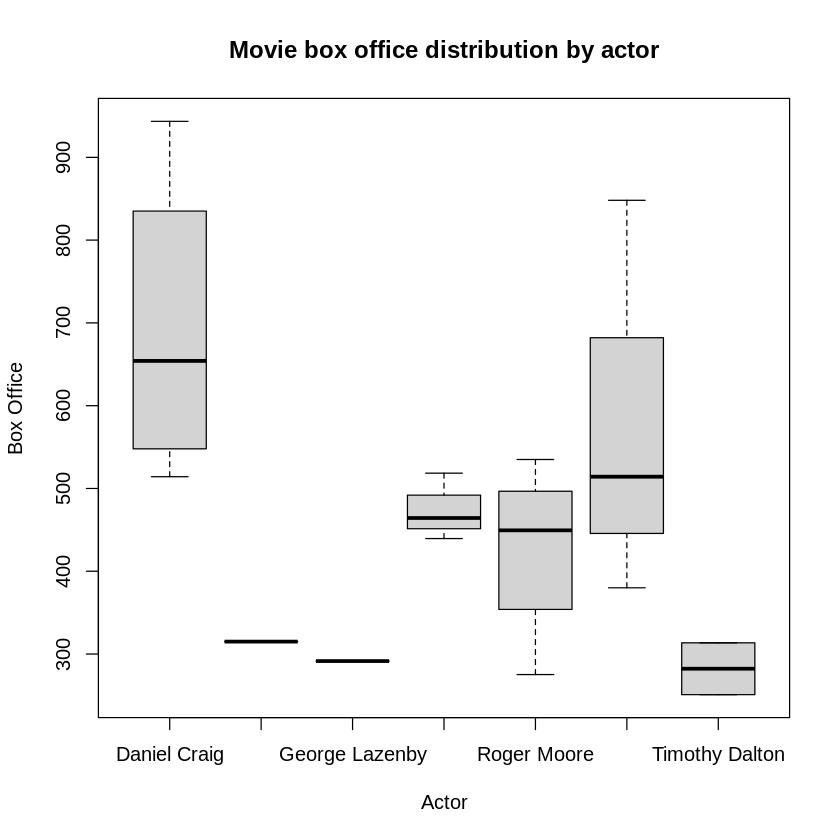

In [ ]:
# boxplot utilizando R base
boxplot(
  `Box Office` ~ Actor,
  data = df_jamesbond,
  main = 'Movie box office distribution by actor'
)

Boxplot utilizando *ggplot*.

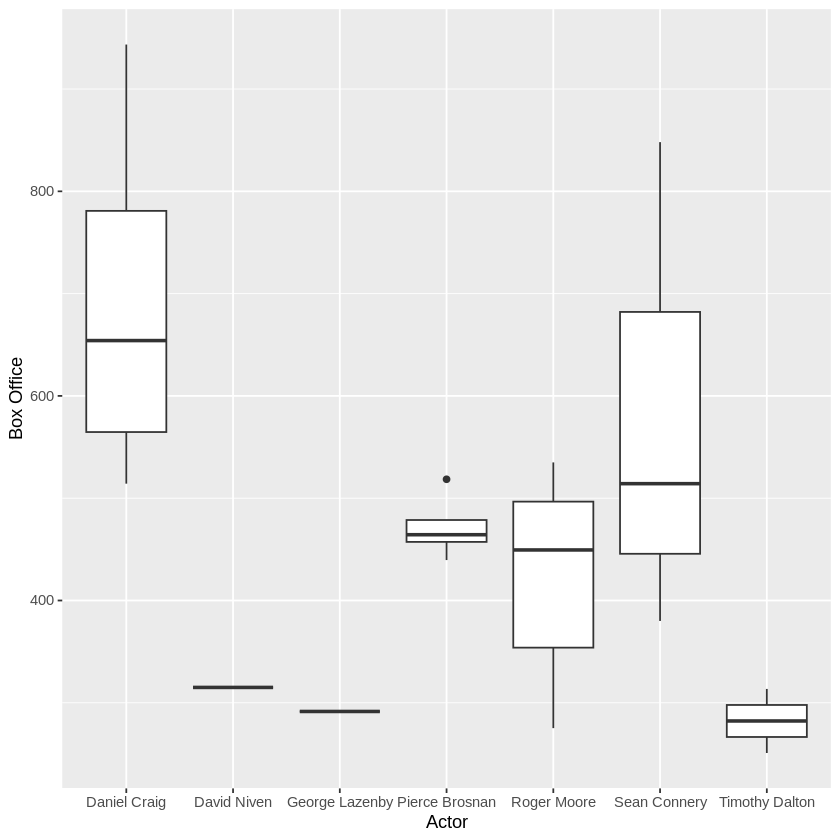

In [ ]:
# gráfico utilizando ggplot()
df_jamesbond %>% ggplot(
  mapping=aes(
    x=Actor
    ,y=`Box Office`
  )
) + geom_boxplot(
)

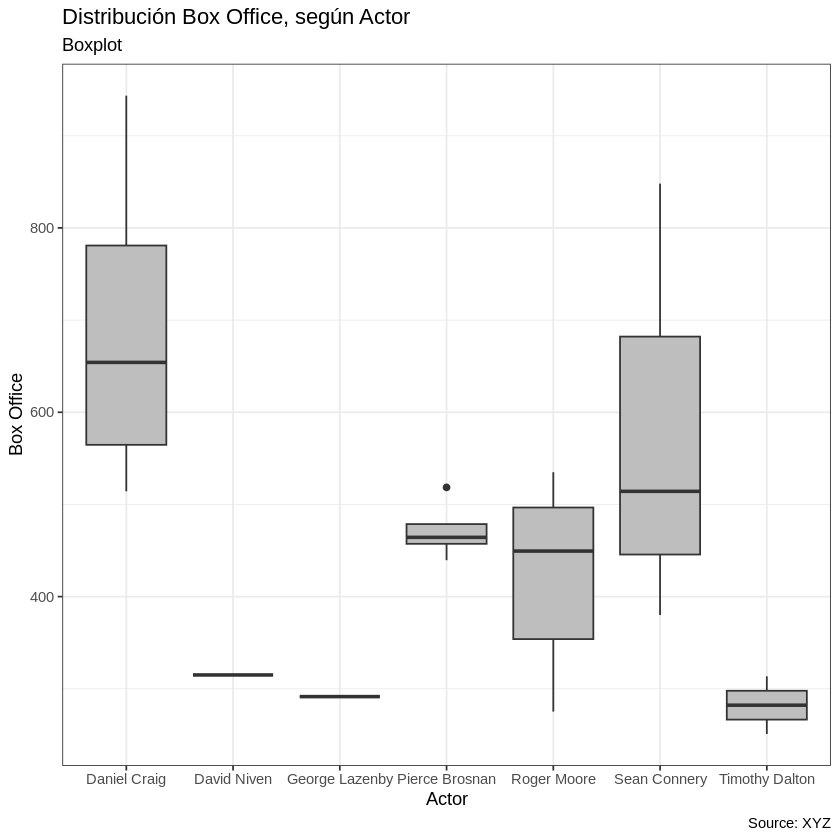

In [ ]:
# Gráfico II utilizando ggplot()
df_jamesbond %>% ggplot(
  mapping=aes(
    x=Actor
    ,y=`Box Office`
  )
) + geom_boxplot(
  fill='grey'
) + theme_bw(
) + labs(
  title="Distribución Box Office, según Actor"        # Title
  ,subtitle="Boxplot"                                 # Subtitle
  ,x="Actor"                                          # Leyend X
  ,y="Box Office"                                     # Leyend Y
  ,caption="Source: XYZ"                              # Footnote
)

# 4. Gráficos de barra
---

In [ ]:
# importamos dataset
df_jamesbond = data.table::fread("https://data-wizards.s3.amazonaws.com/datasets/jamesbond.csv")
glimpse(df_jamesbond)

Rows: 26
Columns: 7
$ Film                <chr> "Dr. No", "From Russia with Love", "Goldfinger", "…
$ Year                <int> 1962, 1963, 1964, 1965, 1967, 1967, 1969, 1971, 19…
$ Actor               <chr> "Sean Connery", "Sean Connery", "Sean Connery", "S…
$ Director            <chr> "Terence Young", "Terence Young", "Guy Hamilton", …
$ `Box Office`        <dbl> 448.8, 543.8, 820.4, 848.1, 315.0, 514.2, 291.5, 4…
$ Budget              <dbl> 7.0, 12.6, 18.6, 41.9, 85.0, 59.9, 37.3, 34.7, 30.…
$ `Bond Actor Salary` <dbl> 0.6, 1.6, 3.2, 4.7, NA, 4.4, 0.6, 5.8, NA, NA, NA,…


In [ ]:
# agregamos la data que utilizaremos para graficar
df = df_jamesbond %>% group_by(Director) %>% summarise(total_movies = n()) %>% arrange(desc(total_movies))
df

Director,total_movies
<chr>,<int>
John Glen,5
Guy Hamilton,4
Lewis Gilbert,3
Terence Young,3
Martin Campbell,2
Sam Mendes,2
Irvin Kershner,1
Ken Hughes,1
Lee Tamahori,1


Comenzamos utilizando `barplot()` de R base para visualizar un gráfico de barra.

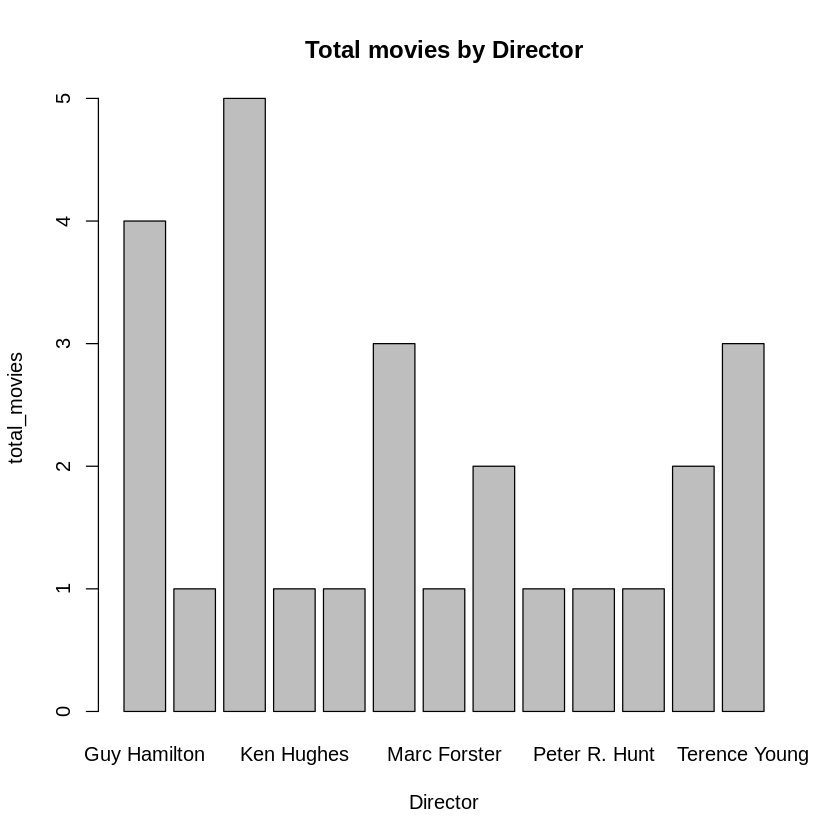

In [ ]:
# generamos gráfico de barra utilizando R base
barplot(
  total_movies ~ Director,
  data = df,
  main = 'Total movies by Director'
)

Gráfico de barra utilizando *ggplot*. La función `geom_col()` nos permite declarar gráficos de barra.

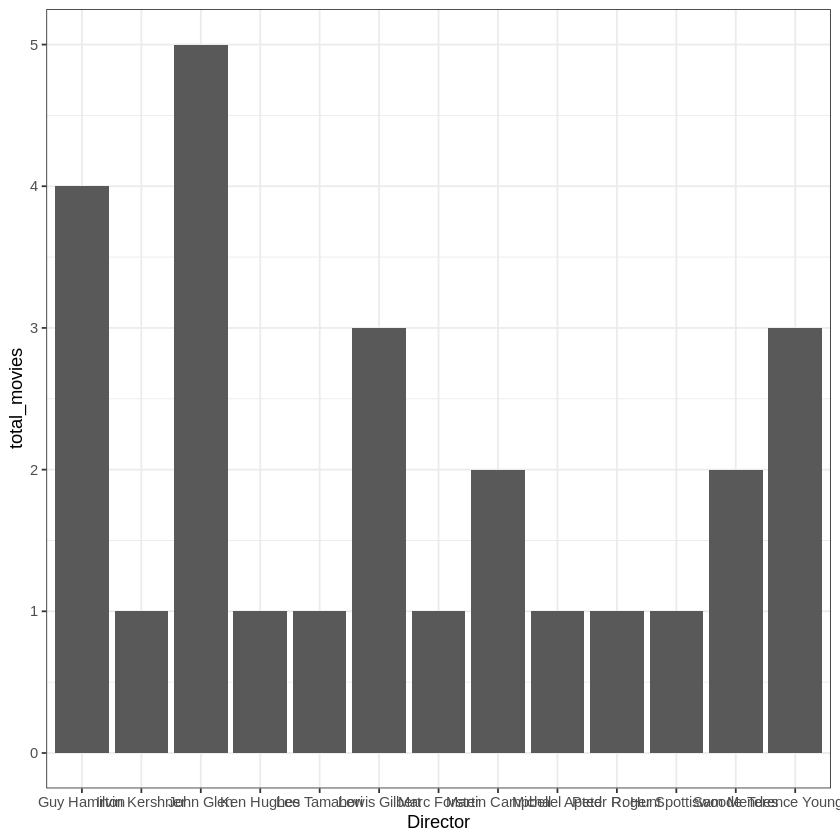

In [ ]:
# gráfico I utilizando ggplot()
df %>% ggplot(
  mapping=aes(
    x=Director,
    y=total_movies
  )
) + geom_col(
) + theme_bw(
)

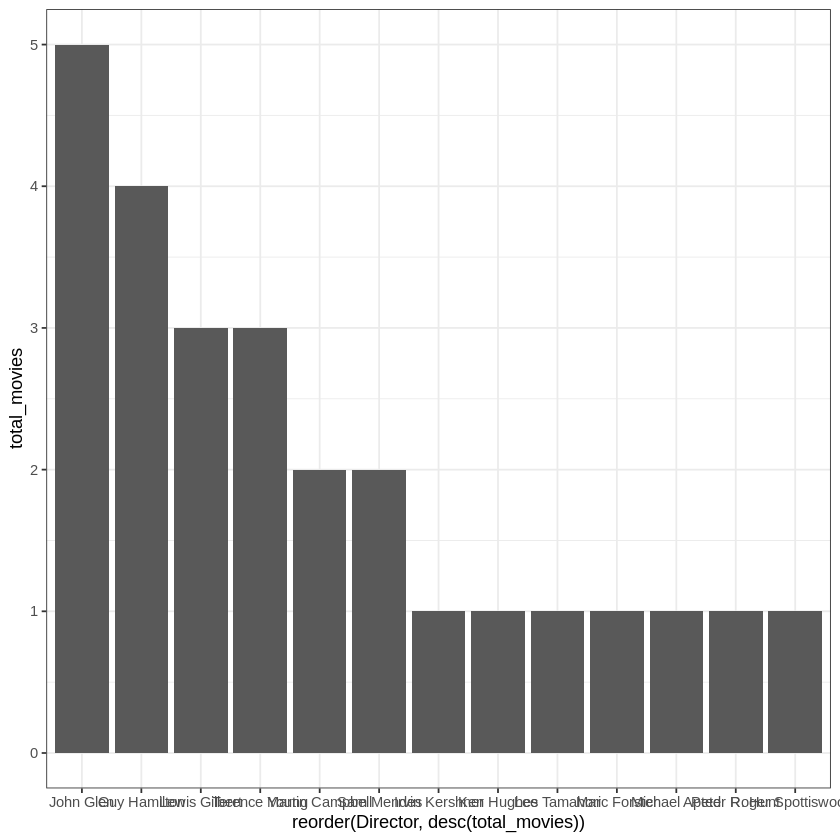

In [ ]:
# gráfico utilizando ggplot()
## ordenamos barras
df %>% ggplot(
  mapping=aes(
    x=reorder(Director, desc(total_movies)),                    # utilizamos función reorder() al declarar x
    y=total_movies
  )
) + geom_col(
) + theme_bw(
)

La función `coord_flip()` nos permite invertir ejes, convirtiendo visualización en gráfico de barra horizontal.

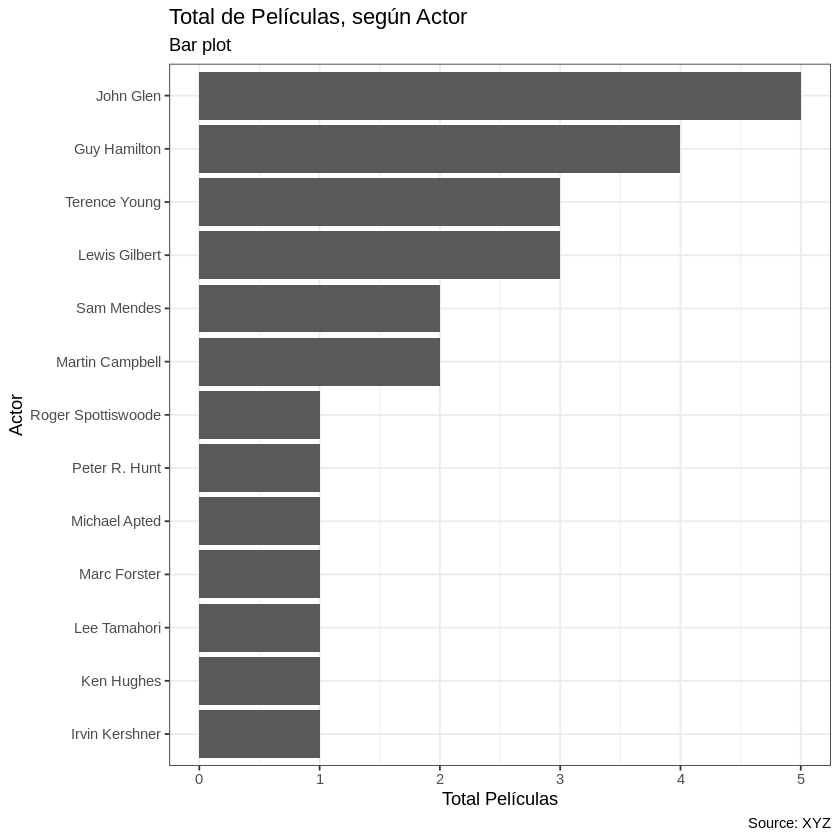

In [ ]:
# gráfico utilizando ggplot()
df %>% ggplot(
  mapping=aes(
    x=reorder(Director, total_movies)
    ,y=total_movies
  )
) + geom_col(
) + theme_bw(
) + coord_flip(
) + labs(
  title="Total de Películas, según Actor"             # Title
  ,subtitle="Bar plot"                                # Subtitle
  ,x="Actor"                                          # Leyend X
  ,y="Total Películas"                                # Leyend Y
  ,caption="Source: XYZ"                              # Footnote
)

# 5. Gráficos de serie temporal
---



In [ ]:
# importamos dataset
df_jamesbond = data.table::fread("https://data-wizards.s3.amazonaws.com/datasets/jamesbond.csv")
glimpse(df_jamesbond)

Rows: 26
Columns: 7
$ Film                <chr> "Dr. No", "From Russia with Love", "Goldfinger", "…
$ Year                <int> 1962, 1963, 1964, 1965, 1967, 1967, 1969, 1971, 19…
$ Actor               <chr> "Sean Connery", "Sean Connery", "Sean Connery", "S…
$ Director            <chr> "Terence Young", "Terence Young", "Guy Hamilton", …
$ `Box Office`        <dbl> 448.8, 543.8, 820.4, 848.1, 315.0, 514.2, 291.5, 4…
$ Budget              <dbl> 7.0, 12.6, 18.6, 41.9, 85.0, 59.9, 37.3, 34.7, 30.…
$ `Bond Actor Salary` <dbl> 0.6, 1.6, 3.2, 4.7, NA, 4.4, 0.6, 5.8, NA, NA, NA,…


In [ ]:
# importamos dataset
df_amzn_stocks = data.table::fread("https://data-wizards.s3.amazonaws.com/datasets/amzn_stocks.csv")
glimpse(df_amzn_stocks)

Rows: 1,896
Columns: 6
$ Date   <IDate> 2010-01-04, 2010-01-05, 2010-01-06, 2010-01-07, 2010-01-08, 2…
$ Open   <dbl> 136.25, 133.43, 134.60, 132.01, 130.56, 132.62, 128.99, 127.90,…
$ High   <dbl> 136.61, 135.48, 134.73, 132.32, 133.68, 132.80, 129.82, 129.71,…
$ Low    <dbl> 133.14, 131.81, 131.65, 128.80, 129.03, 129.21, 126.55, 125.75,…
$ Close  <dbl> 133.90, 134.69, 132.25, 130.00, 133.52, 130.31, 127.35, 129.11,…
$ Volume <int> 7600543, 8856456, 7180977, 11030124, 9833829, 8786668, 9098190,…


Serie temporal utilizando función `plot()` de R base.

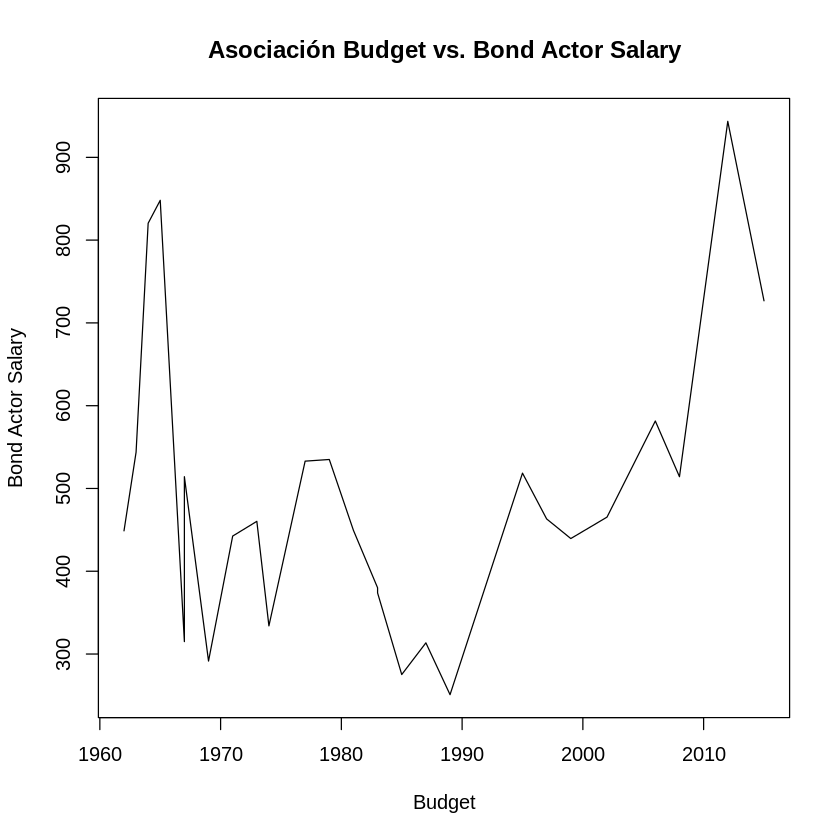

In [ ]:
# serie temporal utilizando R base
plot(
  x=df_jamesbond$Year,
  y=df_jamesbond$`Box Office`,
  type='l',
  main='Asociación Budget vs. Bond Actor Salary',
  xlab='Budget',
  ylab='Bond Actor Salary'
)

Serie temporal utilizando *ggplot*. La función `geom_line()` nos permite declarar gráficos de serie temporal. 

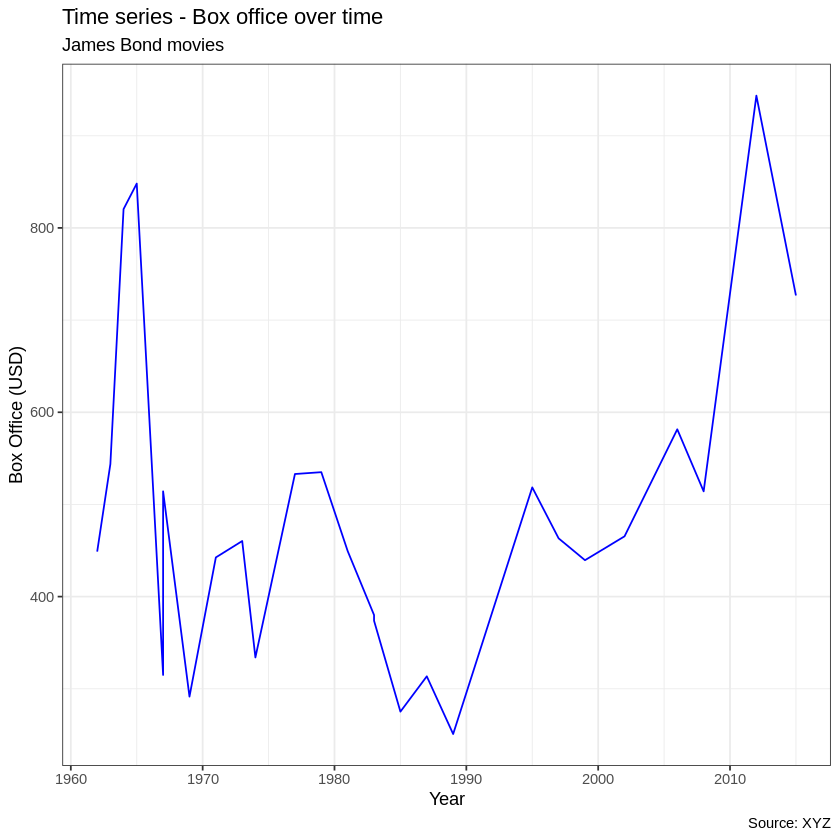

In [ ]:
# gráfico utilizado ggplot
df_jamesbond %>% ggplot(
  mapping=aes(
    x=Year,
    y=`Box Office`
  )
) + geom_line(
  color='blue'
) + theme_bw(
) + labs(
  title="Time series - Box office over time",         # Title
  subtitle="James Bond movies",                       # Subtitle
  x="Year",                                           # Leyend X
  y="Box Office (USD)",                               # Leyend Y
  caption="Source: XYZ"                               # Footnote
)

Por último, generamos un gráfico de serie temporal avanzado. Editaremos la escala de nuestro eje x (tiempo) utilizando la función `scale_x_date()`. 

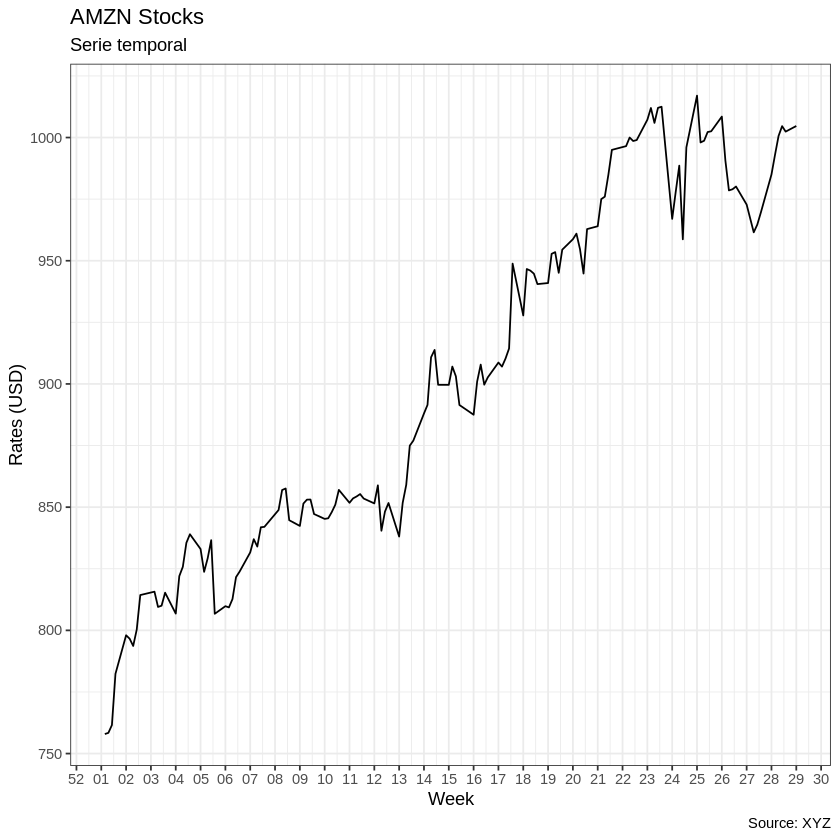

In [ ]:
# filtramos para un año específico y cambiamos la escala a semana
cond = df_amzn_stocks$Date>=as.Date('2017-01-01') & df_amzn_stocks$Date < as.Date('2018-01-01')

df_amzn_stocks[cond] %>% ggplot(
  aes(
    x=Date,
    y=Open
  )
) + geom_line(
) + scale_x_date(
  date_breaks = "week",
  date_labels = "%W"
) + theme_bw(
) + labs(
  title="AMZN Stocks",                                 # Title
  subtitle="Serie temporal",                           # Subtitle
  x="Week",                                            # Leyend X
  y="Rates (USD)",                                     # Leyend Y
  caption="Source: XYZ"                                # Footnote
)

# 6. Ejercicios
---
> 👉 Puedes encontrar las soluciones a los ejercicios [aquí](https://nbviewer.org/github/SomosDataWizards/R-Curso-Introductorio-Ejercicios/blob/main/Capitulo_6_Ejercicios.ipynb)

### Ejercicio #1
Partiendo del dataset publicado por la *World Health Organization*, visualizar un gráfico de dispersión para estudiar el grado de asociación entre el PIB per cápita y el % de población en áreas urbanas. Generar un gráfico independiente por continente.

> https://data-wizards.s3.amazonaws.com/datasets/dataset_na_who.csv

In [ ]:
# importamos dataset
df_who = fread("https://data-wizards.s3.amazonaws.com/datasets/dataset_na_who.csv")
glimpse(df_who)

Rows: 196
Columns: 13
$ Country                                                  <chr> "Afghanistan"…
$ CountryID                                                <int> 1, 2, 3, 4, 5…
$ ContinentID                                              <int> 1, 2, 3, 2, 3…
$ `Adolescent fertility rate (%)`                          <int> 151, 27, 6, N…
$ `Adult literacy rate (%)`                                <dbl> 28.0, 98.7, 6…
$ `Gross national income per capita (PPP international $)` <int> NA, 6000, 594…
$ `Net primary school enrolment ratio female (%)`          <int> NA, 93, 94, 8…
$ `Net primary school enrolment ratio male (%)`            <int> NA, 94, 96, 8…
$ `Population (in thousands) total`                        <int> 26088, 3172, …
$ `Population annual growth rate (%)`                      <dbl> 4.0, 0.6, 1.5…
$ `Population in urban areas (%)`                          <int> 23, 46, 64, 9…
$ `Population living below the poverty line`               <dbl> NA, 2.0, NA, …
$ Continent       

### Ejercicio #2
Graficar un boxplot para estudiar la diferencia en salarios entre razas (race) *Hispanic/Latino, White y Black or African American*. Generar un gráfico independiente para cada género (male vs female). Tener en cuenta únicamente empleados full time.

> Dataset https://data-wizards.s3.amazonaws.com/datasets/employees.csv

In [ ]:
# importamos dataset
df_employees = fread("https://data-wizards.s3.amazonaws.com/datasets/employees.csv")
glimpse(df_employees)

Rows: 2,000
Columns: 10
$ UNIQUE_ID         <int> 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15…
$ POSITION_TITLE    <chr> "ASSISTANT DIRECTOR (EX LVL)", "LIBRARY ASSISTANT", …
$ DEPARTMENT        <chr> "Municipal Courts Department", "Library", "Houston P…
$ BASE_SALARY       <dbl> 121862, 26125, 45279, 63166, 56347, 66614, 71680, 42…
$ RACE              <chr> "Hispanic/Latino", "Hispanic/Latino", "White", "Whit…
$ EMPLOYMENT_TYPE   <chr> "Full Time", "Full Time", "Full Time", "Full Time", …
$ GENDER            <chr> "Female", "Female", "Male", "Male", "Male", "Male", …
$ EMPLOYMENT_STATUS <chr> "Active", "Active", "Active", "Active", "Active", "A…
$ HIRE_DATE         <IDate> 2006-06-12, 2000-07-19, 2015-02-03, 1982-02-08, 19…
$ JOB_DATE          <IDate> 2012-10-13, 2010-09-18, 2015-02-03, 1991-05-25, 19…


### Ejercicio #3
Generar un gráfico de barras para visualizar cantidad de personajes de Star Wars, según planeta de origen. 

> Dataset https://data-wizards.s3.amazonaws.com/datasets/dataset_star_wars.csv

In [ ]:
# importamos dataset
df_starwars = fread("https://data-wizards.s3.amazonaws.com/datasets/dataset_star_wars.csv")
glimpse(df_starwars)

Rows: 87
Columns: 10
$ name       <chr> "Mon Mothma", "Yoda", "Tion Medon", "Ratts Tyerell", "Luke …
$ height     <int> 150, 66, 206, 79, 172, 96, 165, 228, 188, 188, 184, 150, 18…
$ mass       <dbl> NA, 17.0, 80.0, 15.0, 77.0, 32.0, 75.0, 112.0, 79.0, 84.0, …
$ hair_color <chr> "auburn", "white", "none", "none", "blond", "", "brown", "b…
$ skin_color <chr> "fair", "green", "grey", "grey & blue", "fair", "white & bl…
$ eye_color  <chr> "blue", "brown", "black", "unknown", "blue", "red", "blue",…
$ birth_year <dbl> 48.0, 896.0, NA, NA, 19.0, 33.0, 47.0, 200.0, NA, 72.0, NA,…
$ gender     <chr> "female", "male", "male", "male", "male", "", "female", "ma…
$ homeworld  <chr> "Chandrila", "", "Utapau", "Aleen Minor", "Tatooine", "Nabo…
$ species    <chr> "Human", "Yoda's species", "Pau'an", "Aleena", "Human", "Dr…
